In [8]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [27]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs,
                     verbose=0
                     )

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [22]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    
    # Convert feature and label to NumPy arrays
    feature = np.array(feature).flatten()
    label = np.array(label).flatten()
    
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")
    
    # Plot the feature values vs. label values.
    plt.scatter(feature, label)
    
    # Create a red line representing the model.
    x = np.linspace(np.min(feature), np.max(feature), 100)
    y = trained_bias + trained_weight * x
    
    # Ensure the shapes of x and y match.
    x = x.flatten()
    y = y.flatten()
    
    plt.plot(x, y, c='r')
    
    # Render the scatter plot and the red line.
    plt.show()
    
    
    
def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [4]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 356ms/step - loss: 347.0443 - root_mean_squared_error: 18.6291
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 337.3971 - root_mean_squared_error: 18.3684
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 330.5299 - root_mean_squared_error: 18.1805
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 324.8573 - root_mean_squared_error: 18.0238
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 319.8784 - root_mean_squared_error: 17.8851
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 315.3609 - root_mean_squared_error: 17.7584
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 311.1761 - root_mean_squared_error: 17.6402
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 307.2435 - root_mean_squared_error: 17.5284
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 303.5097 - root_

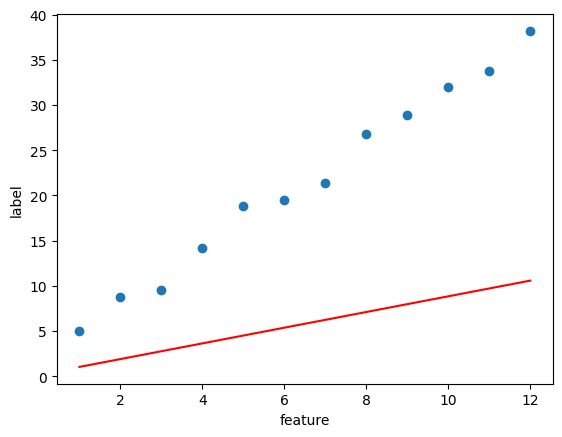

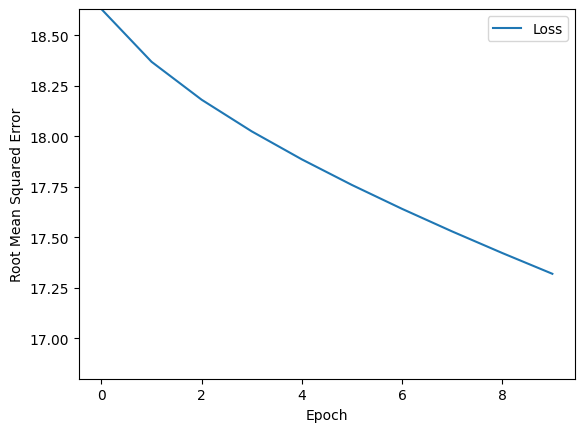

In [23]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

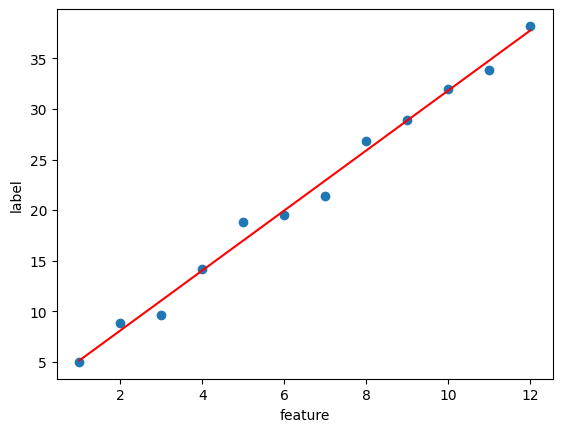

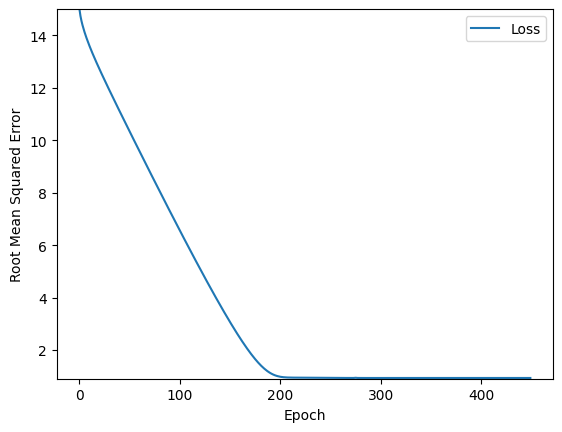

In [28]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

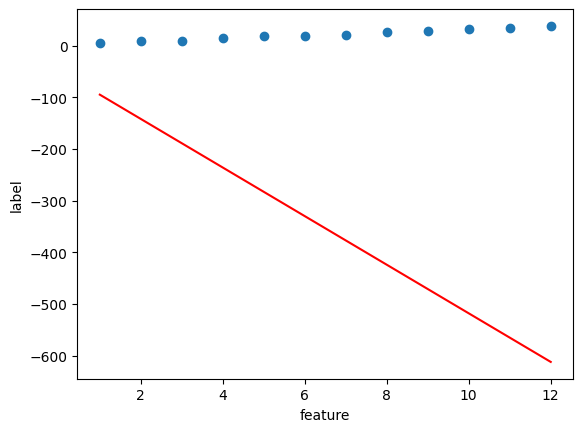

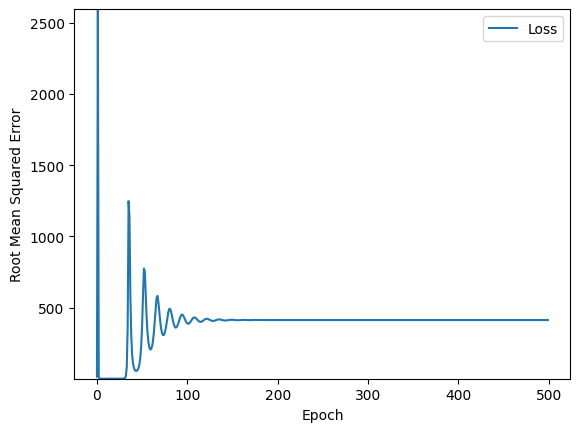

In [29]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

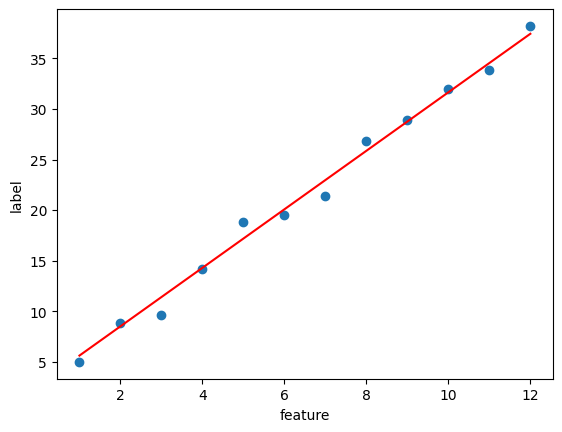

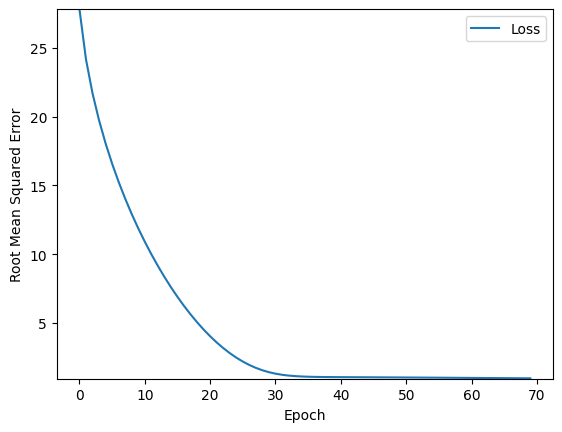

In [30]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

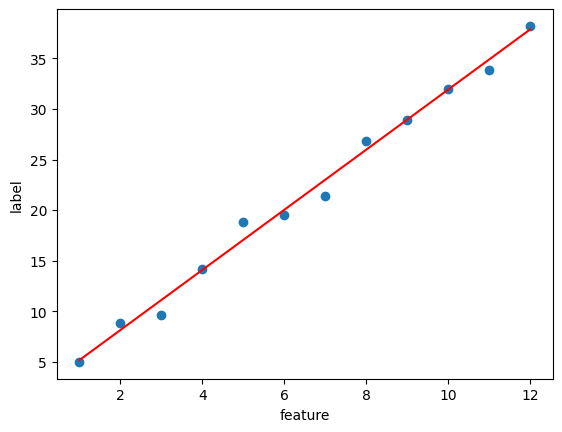

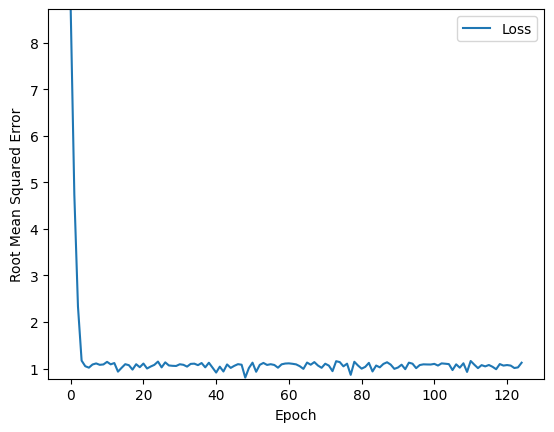

In [31]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
